In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [8]:
columns_encoded=['Extracurricular Activities']
dummies=pd.get_dummies(df[columns_encoded]).astype(int)

In [9]:
dummies.head()

,Extracurricular Activities_No,Extracurricular Activities_Yes
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [10]:
merge=pd.concat([df,dummies],axis='columns')

In [11]:
merge.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,Yes,9,1,91.0,0,1
1,4,82,No,4,2,65.0,1,0
2,8,51,Yes,7,2,45.0,0,1
3,5,52,Yes,5,2,36.0,0,1
4,7,75,No,8,5,66.0,1,0


In [12]:
newdf=merge.drop(['Extracurricular Activities'],axis=1)

In [13]:
newdf.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


In [14]:
newdf.corr()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730,-0.003873,0.003873
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189,-0.008369,0.008369
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106,0.023284,-0.023284
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268,-0.013103,0.013103
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000,-0.024525,0.024525
Extracurricular Activities_No,-0.003873,-0.008369,0.023284,-0.013103,-0.024525,1.000000,-1.000000
Extracurricular Activities_Yes,0.003873,0.008369,-0.023284,0.013103,0.024525,-1.000000,1.000000


<Axes: >

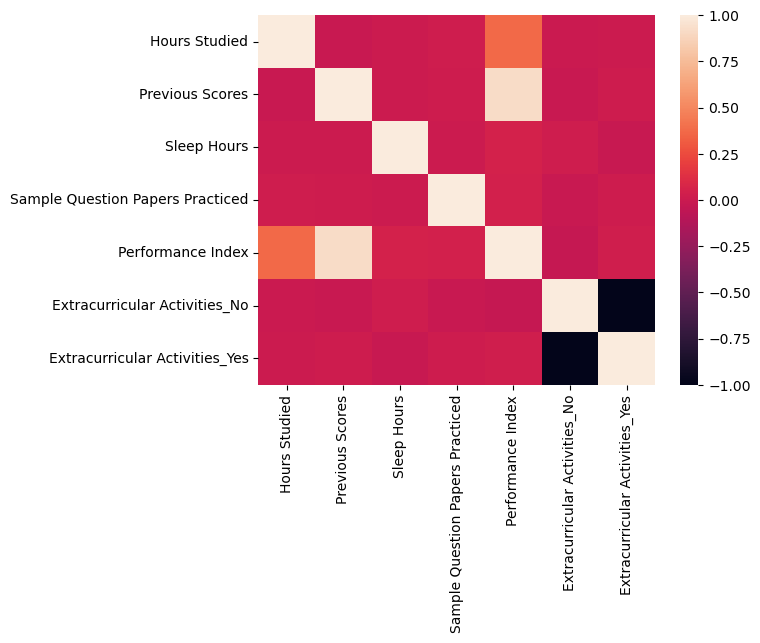

In [15]:
sb.heatmap(newdf.corr())

In [16]:
x=newdf.drop(['Performance Index'],axis=1)

In [17]:
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,0,1
1,4,82,4,2,1,0
2,8,51,7,2,0,1
3,5,52,5,2,0,1
4,7,75,8,5,1,0


In [18]:
y=newdf.iloc[:,4:5]

In [19]:
y.head()

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=42)

In [22]:
xtrain.shape

(8000, 6)

In [23]:
ytrain.shape

(8000, 1)

In [24]:
xtest.shape

(2000, 6)

In [25]:
ytest.shape

(2000, 1)

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler=MinMaxScaler()

In [28]:
xtrain=scaler.fit_transform(xtrain)

In [29]:
ytest=scaler.transform(xtest)

In [30]:
xtrain.shape

(8000, 6)

In [31]:
ytest.shape

(2000, 6)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [33]:
model=Sequential()

In [34]:
model.add(Dense(6,input_dim=6,activation='relu'))
model.add(Dense(3,activation='relu'))
model.add(Dense(1,activation='relu'))

C:\Users\Lotus\anaconda3\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
#compiling model
model.compile(loss='mse',optimizer='adam')

In [36]:
#fitting model
model.fit(x=xtrain,y=ytrain,validation_data=(xtest,ytest),epochs=150,batch_size=64)

Epoch 1/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3212.9626 - val_loss: 27798.1875
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2616.7366 - val_loss: 185248.1875
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1525.2549 - val_loss: 739604.8125
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 580.3656 - val_loss: 1583923.6250
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 256.0880 - val_loss: 2134151.0000
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 216.0382 - val_loss: 2449592.7500
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 197.6087 - val_loss: 2757628.0000
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 176.6686 - val_loss: 3089369.2500
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 158.1711 - val_loss: 3472311.7500
Epoch 10/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 143.6256 - val_loss: 3945686.0000
Epoch 11/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1811 - val_loss: 19418550.0000
Epoch 65/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0792 - val_loss: 19474542.0000
Epoch 66/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2420 - val_loss: 19418894.0000
Epoch 67/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1877 - val_loss: 19504568.0000
Epoch 68/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2851 - val_loss: 19481090.0000
Epoch 69/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2031 - val_loss: 19441572.0000
Epoch 70/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1674 - val_loss: 19478212.0000
Epoch 71/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2019 - val_loss: 19481830.0000
Epoch 72/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2714 - val_loss: 19438550.0000
Epoch 73/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3075 - val_loss: 19298016.0000
Epoch 74/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2316 - val_loss: 19372056.0000
Epoch 128/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2122 - val_loss: 19461520.0000
Epoch 129/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1483 - val_loss: 19405506.0000
Epoch 130/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0501 - val_loss: 19479988.0000
Epoch 131/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1262 - val_loss: 19645654.0000
Epoch 132/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2079 - val_loss: 19438834.0000
Epoch 133/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1708 - val_loss: 19422928.0000
Epoch 134/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1601 - val_loss: 19525450.0000
Epoch 135/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.2149 - val_loss: 19506582.0000
Epoch 136/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0714 - val_loss: 19363740.0000
Epoch 137/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [37]:
loss_df=pd.DataFrame(model.history.history)
loss_df

,loss,val_loss
0,3095.210205,2.779819e+04
1,2375.861572,1.852482e+05
2,1261.739014,7.396048e+05
3,458.957489,1.583924e+06
4,240.936859,2.134151e+06
...,...,...
145,4.191135,1.949387e+07
146,4.186897,1.952298e+07
147,4.192824,1.945210e+07
148,4.196999,1.946037e+07


<Axes: >

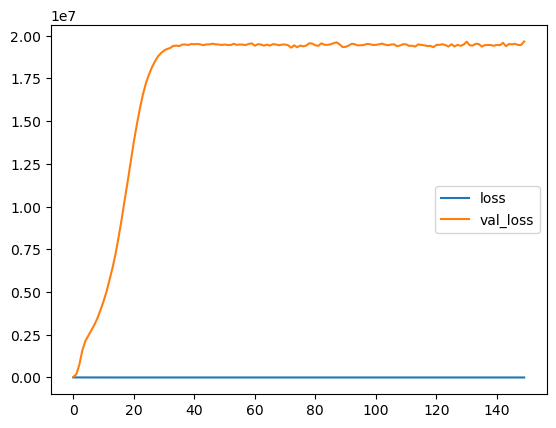

In [38]:
loss_df.plot()